In [1]:
import gensim
from gensim.models import KeyedVectors
import collections
from collections import OrderedDict
import os



In [2]:
path = '/home/ayan-yue/Documents/projects/dynamic-word-embeddings/diachronic-models/'

In [3]:
dyn_vec = OrderedDict()
t = 19

for i in range(t):
    for file in os.listdir(path):
        filename = os.path.join(path, file)
        
        if os.path.basename(filename).split('.')[0][1:] == str(i):
            dyn_vec['t{0}'.format(i)] = KeyedVectors.load(filename)
    
    

In [4]:
import pickle

with open('pickled_d', 'rb') as fp:
    d = pickle.load(fp)


In [5]:
for key in d:
    d[key] = d[key].split(' ')
    

In [6]:
def vocab_search(string):
    
    slices = []
    for key in d:
        for i in range(len(d[key])):
            if d[key][i] == string:
                slices.append(key)
                break
    
    return slices
            

In [7]:
m = vocab_search('innovation')

In [8]:
m

['t0', 't5', 't6', 't10', 't11']

In [9]:
import networkx as nx

G = nx.Graph()

In [10]:
nodes = dyn_vec['t0'].most_similar('innovation')

/home/ayan-yue/Documents/projects/env1/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [11]:
dyn_vec['t0'].similarity('innovation', 'reform')

/home/ayan-yue/Documents/projects/env1/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9756483

In [12]:
type(nodes[0][0])

str

In [13]:
#list(G.adjacency()) to analyze graph
for i in range(len(nodes)):
    cos_sim = dyn_vec['t0'].similarity('innovation', nodes[i][0])
    G.add_edge('innovation', nodes[i][0], weight=cos_sim)
    for j in range(len(nodes)):
        cos_sim = dyn_vec['t0'].similarity(nodes[i][0], nodes[j][0])
        G.add_edge(nodes[i][0], nodes[j][0], weight=cos_sim)
        G.remove_edges_from(G.selfloop_edges())
        
        
        
     
    

/home/ayan-yue/Documents/projects/env1/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ayan-yue/Documents/projects/env1/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


In [14]:
#list(G.adjacency()) to analyze graph

In [15]:
import matplotlib.pyplot as plt

In [16]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.97]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.97]

/home/ayan-yue/Documents/projects/env1/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


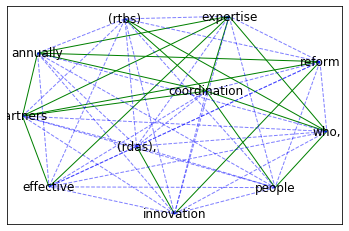

In [17]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 0)

nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1, edge_color='g' )

nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='b', style='dashed')

nx.draw_networkx_labels(G, pos)

plt.show()